Housing Case Study


Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.



In [146]:
import pandas as pd
import numpy as np


In [147]:
df=pd.read_csv('/Users/cilvosimon/Codes/pandas/linear_regression/Housing.csv')

In [148]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Data Preparation

Convert 'Yes' and 'No' to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.



In [150]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})


In [151]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [152]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
312,4098500,3600,3,1,1,1,0,1,0,1,0,1,furnished
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,semi-furnished
221,4767000,3420,4,2,2,1,0,0,0,0,0,0,semi-furnished
183,5145000,7980,3,1,1,1,0,0,0,0,1,1,semi-furnished
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,furnished
182,5145000,3410,3,1,2,0,0,0,0,1,0,0,semi-furnished
252,4515000,9860,3,1,1,1,0,0,0,0,0,0,semi-furnished
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,furnished
525,2345000,3640,2,1,1,1,0,0,0,0,0,0,unfurnished
319,4060000,3000,4,1,3,1,0,1,0,1,2,0,semi-furnished


The variable 'furnishingstatus' had three levels. Need to convert it to integer.

In [153]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(df['furnishingstatus'])


In [154]:
# The result has created three variables that are not needed.
status.head()


,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [155]:
# we don't need 3 columns. Because any one category should be 1, so only 2 is enough
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)


In [156]:
status

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [157]:
#Adding the results to the master dataframe
df = pd.concat([df,status],axis=1)


In [158]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [159]:
# Dropping furnishingstatus as we have created the dummies for it
df.drop(['furnishingstatus'],axis=1,inplace=True)


In [160]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


Creating a new variable for area per bedroom as it can affect the pricing

In [161]:
# Let's create the new metric and assign it to "areaperbedroom"
df['areaperbedroom'] = df['area']/df['bedrooms']


In [162]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False,1855.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False,2240.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False,3320.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False,1875.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False,1855.0


Creating a new variable for bathroom per bedroom as it can affect the pricing

In [163]:
# Metric:bathrooms per bedroom
df['bbratio'] =df['bathrooms']/df['bedrooms']


In [164]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False,1855.0,0.250000


In [165]:
# Convert boolean columns to integers (for semifurnished and unfurnished columns)
df = df.astype(float)


In [166]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1855.0,0.500000
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,2240.0,1.000000
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,3320.0,0.666667
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,1875.0,0.500000
4,11410000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1855.0,0.250000


**Rescaling the Features**

Rescale the variables so that they have a comparable scale. There are two ways of rescaling

1. Normalisation (min-max scaling) and

    -Values to 0 to 1

2. standardisation (mean-o, sigma-1)

    -Z score Value 
    
    
Let's try normalisation here


In [167]:
# Defining normalization function
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Applying normalization to all columns
df = df.apply(lambda x: normalize(x))



In [168]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [169]:
#Incase you want to do standardization
'''import numpy as np
import pandas as pd

# Defining standardization function (Z-score normalization)
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Applying standardization to all columns
df_standardized = df.apply(lambda x: standardize(x))

# Checking the mean and standard deviation of a column (to verify)
print(f"Mean after standardization: {df_standardized.mean()}")
print(f"Standard deviation after standardization: {df_standardized.std()}")'''


'import numpy as np\nimport pandas as pd\n\n# Defining standardization function (Z-score normalization)\ndef standardize(x):\n    return (x - np.mean(x)) / np.std(x)\n\n# Applying standardization to all columns\ndf_standardized = df.apply(lambda x: standardize(x))\n\n# Checking the mean and standard deviation of a column (to verify)\nprint(f"Mean after standardization: {df_standardized.mean()}")\nprint(f"Standard deviation after standardization: {df_standardized.std()}")'

**Splitting Data into Training and Testing Sets**

In [170]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [171]:
# Putting feature variable to X
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = df['price']


In [201]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)


**Building a linear model**

In [202]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
359,0.134021,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.131693,0.20
19,0.327835,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.282843,0.60
159,0.103093,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.107574,0.60
35,0.367698,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.313930,0.60
28,0.432990,0.8,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.194404,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.105155,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.194404,0.40
53,0.240550,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.214772,0.60
350,0.121649,0.2,0.000000,0.333333,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,0.213700,0.40
79,0.298969,0.4,0.333333,0.666667,1.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.260331,0.60


In [173]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [174]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()


In [175]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.56e-82
Time:                        19:43:42   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

**ASSUMPTION : Check Linearity (Scatter Plot & Residual Plot)**

The relationship between X and Y must be linear

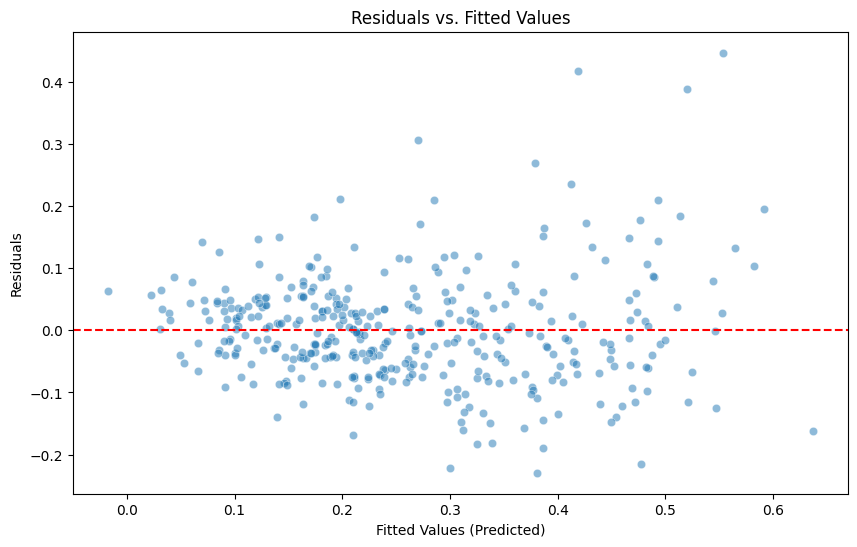

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions and residuals
y_train_pred = lm_1.predict(X_train)  # Predict using the original X_train (with constant)
residuals = y_train - y_train_pred

# Residual vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

Interpreting Linearity from the Residual Plot
In your residual vs. fitted values plot:

If linearity holds, the residuals should be randomly scattered around zero with no clear pattern.
If linearity is violated, you may see a curved or systematic pattern in residuals, indicating a possible nonlinear relationship between predictors and the target variable.


**Ramsey RESET Test**


This test checks if a linear model is misspecified (i.e., if higher-order polynomial terms are needed).

If p-value < 0.05, non-linearity is present → Model needs polynomial terms or transformations.


If p-value > 0.05, linearity assumption holds.

In [177]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(lm_1, power=2, use_f=True)  # power=2 tests quadratic effects
print(reset_test)


<F test: F=19.28050544974455, p=1.4812408558305171e-05, df_denom=364, df_num=1>


Since the p-value < 0.05, we reject the null hypothesis, meaning the model likely lacks important nonlinear terms. This suggests that the linearity assumption is violated, and a simple linear model may not fully capture the relationship.



**To over-come non-linearity we are adding Polynomial Terms (Quadratic / Cubic)**


In [178]:
from sklearn.preprocessing import PolynomialFeatures

# Fit PolynomialFeatures on X_train (not entire X) to avoid data leakage
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_train_poly = sm.add_constant(X_train_poly)  # Add constant after transformation

model_poly = sm.OLS(y_train, X_train_poly).fit()

print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     9.362
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           8.66e-11
Time:                        19:43:54   Log-Likelihood:                 1046.4
No. Observations:                 381   AIC:                            -1395.
Df Residuals:                      32   BIC:                            -18.77
Df Model:                         348                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7383      1.194     -0.618      0.5

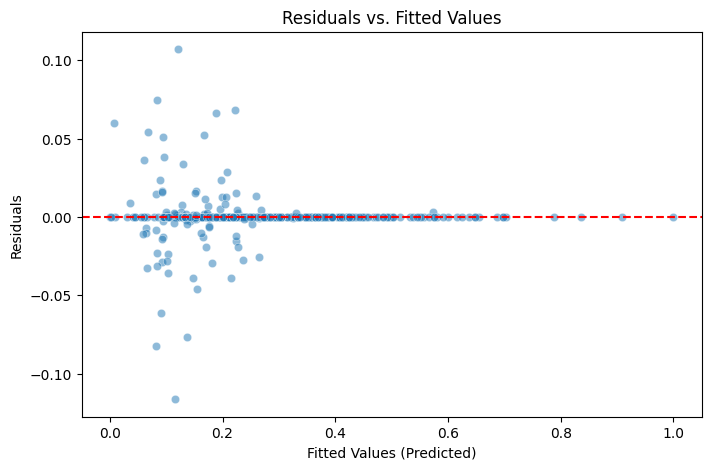

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions and residuals
y_train_pred = model_poly.predict(X_train_poly)  # Predict using the original X_train (with constant)
residuals = y_train - y_train_pred

# Residual vs. Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [180]:
# Perform Ramsey RESET test (correct function name)
reset_result = sm.stats.diagnostic.linear_reset(model_poly, power=2,use_f=True)
print(f"Ramsey RESET Test F-statistic: {reset_result.fvalue}")
print(f"Ramsey RESET Test p-value: {reset_result.pvalue}")

Ramsey RESET Test F-statistic: 3.554748831522553
Ramsey RESET Test p-value: 0.06877792982826515


here p>0.05 so model rejects null hypothesis

so we can proceede with this model

**ASSUMPTION 2 - Independence Test : Durbin-Watson Test**

The Durbin-Watson (DW) test checks for autocorrelation in residuals:

DW ≈ 2 → No autocorrelation (ideal).


DW < 1.5 → Positive autocorrelation (problematic).


DW > 2.5 → Negative autocorrelation.


In [184]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw_stat = durbin_watson(model_poly.resid)

print(f"Durbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 1.7951561633126243


In [185]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(lm_1.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 2.0867191980526965


Alternative: Breusch-Pagan Test
𝐻
0
:
Homoscedasticity (good)
H 
0
​
 :Homoscedasticity (good)
𝐻
1
:
Heteroscedasticity (bad)
H 
1
​
 :Heteroscedasticity (bad)
python
Copy
Edit
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(ols_model.resid, X_train_const)
print(f'Breusch-Pagan p-value: {bp_test[1]}')
✅ Interpretation: p-value > 0.05 → Homoscedasticity holds.



In [60]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_train)
labels = ['LM Statistic', 'p-value', 'F-Statistic', 'F p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': np.float64(34.52176355702244), 'p-value': np.float64(0.002874970971175561), 'F-Statistic': np.float64(2.4244800727210927), 'F p-value': np.float64(0.0022447406909497877)}


3️⃣ Homoscedasticity Test (Constant Variance of Residuals)
✅ Check: Residuals vs. Fitted Plot
Homoscedasticity means the variance of residuals is constant across all fitted values.


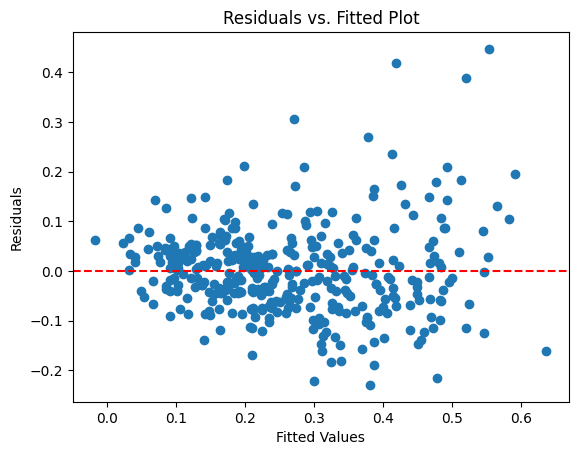

In [186]:
# Residual vs. Fitted Plot
plt.scatter(lm_1.fittedvalues, lm_1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Plot")
plt.show()

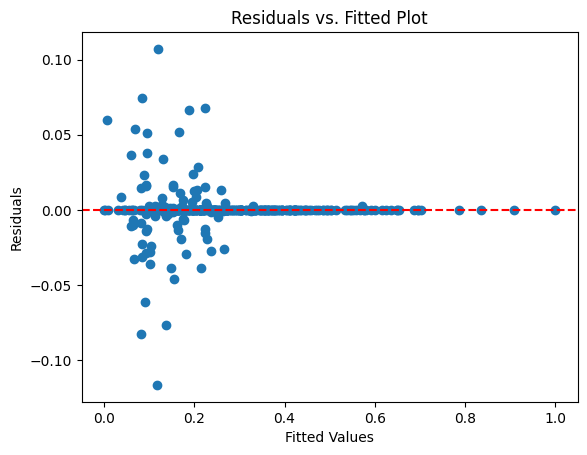

In [187]:
# Residual vs. Fitted Plot
plt.scatter(model_poly.fittedvalues, model_poly.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Plot")
plt.show()

Alternative: Breusch-Pagan Test
𝐻
0
:
Homoscedasticity (good)
H 
0
​
 :Homoscedasticity (good)
𝐻
1
:
Heteroscedasticity (bad)
H 
1
​
 :Heteroscedasticity (bad)



In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_poly.resid, X_train_poly)
print(f'Breusch-Pagan p-value: {bp_test[1]}')

Breusch-Pagan p-value: 1.0


In [190]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(lm_1.resid, X_train)
print(f'Breusch-Pagan p-value: {bp_test[1]}')

Breusch-Pagan p-value: 7.965072116973913e-06


5️⃣ Normality of Residuals Test
✅ Check: Q-Q Plot
Residuals should follow a normal distribution.

python
Copy
Edit
import scipy.stats as stats
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(ols_model.resid, line='45')
plt.show()
✅ Interpretation: If points follow the 45-degree line, residuals are normal.



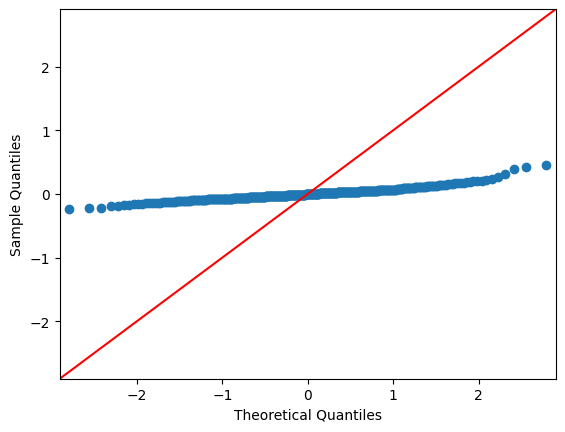

In [191]:
import scipy.stats as stats
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(lm_1.resid, line='45')
plt.show()


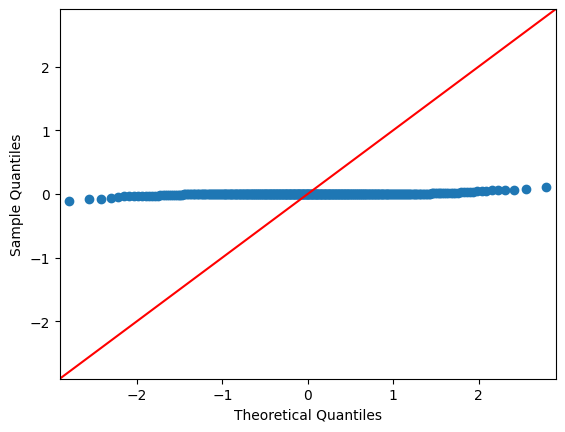

In [192]:
import scipy.stats as stats
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(model_poly.resid, line='45')
plt.show()


Alternative: Shapiro-Wilk Test
𝐻
0
:
Residuals are normal
H 
0
​
 :Residuals are normal
𝐻
1
:
Residuals are NOT normal
H 
1
​
 :Residuals are NOT normal
python
Copy
Edit
from scipy.stats import shapiro

shapiro_test = shapiro(ols_model.resid)
print(f'Shapiro-Wilk p-value: {shapiro_test.pvalue}')
✅ Interpretation: p-value > 0.05 → Residuals are normally distributed.



In [193]:
from scipy.stats import shapiro

shapiro_test = shapiro(lm_1.resid)
print(f'Shapiro-Wilk p-value: {shapiro_test.pvalue}')


Shapiro-Wilk p-value: 1.5881744549946876e-10


In [194]:
from scipy.stats import shapiro

shapiro_test = shapiro(model_poly.resid)
print(f'Shapiro-Wilk p-value: {shapiro_test.pvalue}')


Shapiro-Wilk p-value: 4.4967805323912497e-32


VIF testing

In [195]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)


In [196]:
# Calculating Vif value|
vif_cal(input_data=df, dependent_col="price")


,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


correlation matrix

<Axes: >

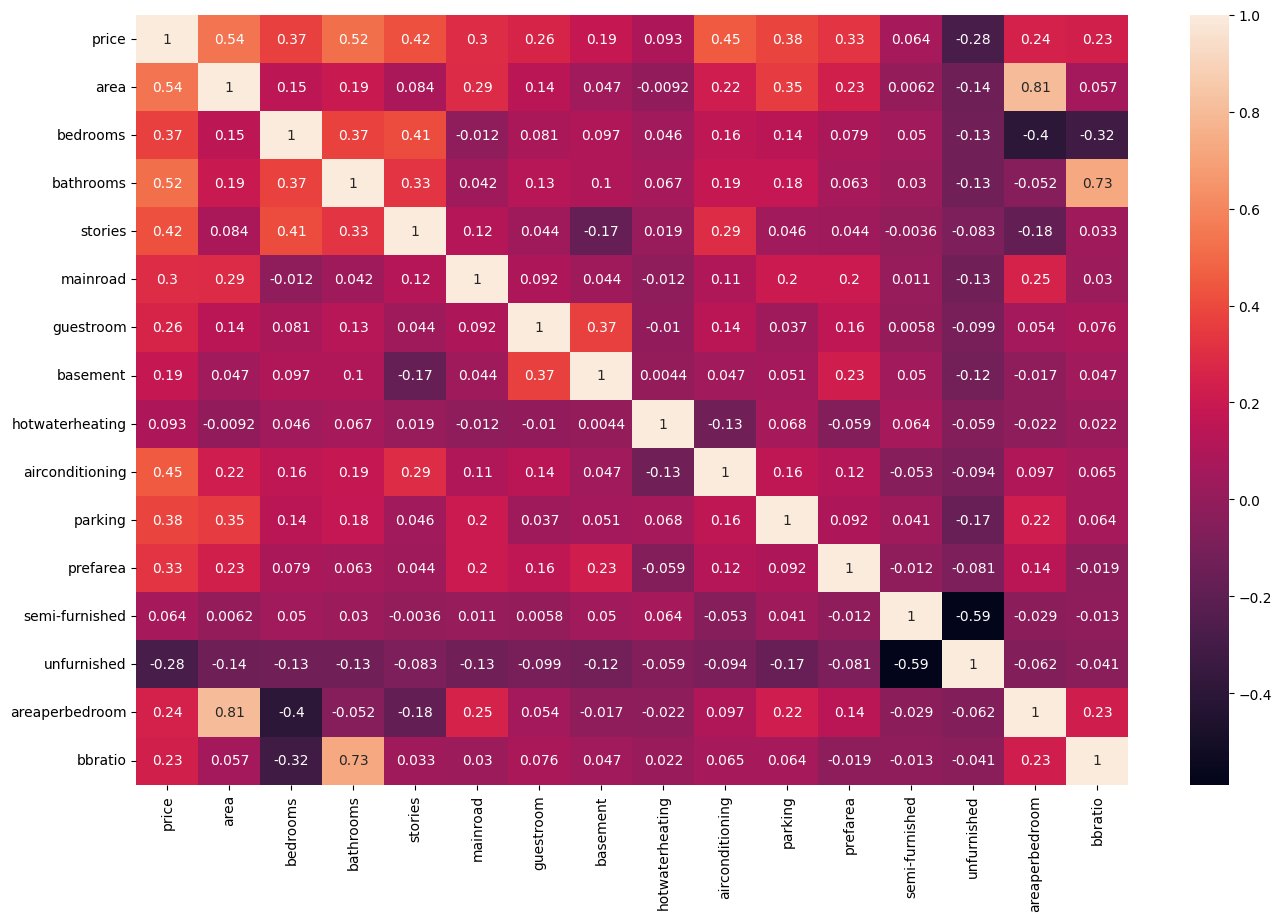

In [198]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(df.corr(),annot = True)


In [205]:
# Dropping highly correlated variables and insignificant variables
x_train = X_train.drop('bbratio', axis=1)


In [206]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()


In [207]:
#Let's see the summary of our second linear model
print(lm_2.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              264.9
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                   5.18e-186
Time:                        20:21:45   Log-Likelihood:                          383.85
No. Observations:                 381   AIC:                                     -737.7
Df Residuals:                     366   BIC:                                     -678.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [208]:
# Calculating Vif value
vif_cal(input_data=df.drop(["bbratio"], axis=1), dependent_col="price")


,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [209]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', axis=1)


In [210]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()


In [211]:
#Let's see the summary of our third linear model
print(lm_3.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              284.1
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                   4.10e-187
Time:                        20:22:38   Log-Likelihood:                          383.53
No. Observations:                 381   AIC:                                     -739.1
Df Residuals:                     367   BIC:                                     -683.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [212]:
# Calculating Vif value
vif_cal(input_data=df.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")


,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [213]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('areaperbedroom', axis=1)


In [214]:
# Create a fourth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()


In [215]:
print(lm_4.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              299.4
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                   1.32e-186
Time:                        20:23:44   Log-Likelihood:                          379.32
No. Observations:                 381   AIC:                                     -732.6
Df Residuals:                     368   BIC:                                     -681.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [216]:
# Calculating Vif value
vif_cal(input_data=df.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")


,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [218]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', axis=1)


In [219]:
# Create a fifth fitted model
lm_5 = sm.OLS(y_train,X_train).fit()


In [220]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              323.9
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                   1.42e-187
Time:                        20:24:31   Log-Likelihood:                          378.62
No. Observations:                 381   AIC:                                     -733.2
Df Residuals:                     369   BIC:                                     -685.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [222]:
# Calculating Vif value
vif_cal(input_data=df.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")


,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [223]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', axis=1)


In [224]:
# Create a sixth fitted model
lm_6 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our sixth linear model
print(lm_6.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              346.8
Date:                Tue, 11 Mar 2025   Prob (F-statistic):                   2.69e-187
Time:                        20:25:25   Log-Likelihood:                          374.90
No. Observations:                 381   AIC:                                     -727.8
Df Residuals:                     370   BIC:                                     -684.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [225]:
# Calculating Vif value
vif_cal(input_data=df.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")


,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


Making Predictions Using the Final Model¶
Prediction with Model 6¶

In [226]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)


In [227]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)


In [228]:
# Making predictions
y_pred_m6 = lm_6.predict(X_test_m6)


Model Evaluation¶


Text(0, 0.5, 'Housing Price')

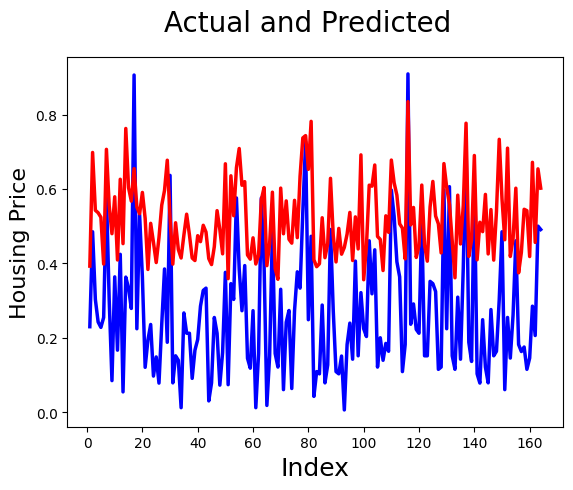

In [229]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label


Text(0, 0.5, 'y_pred')

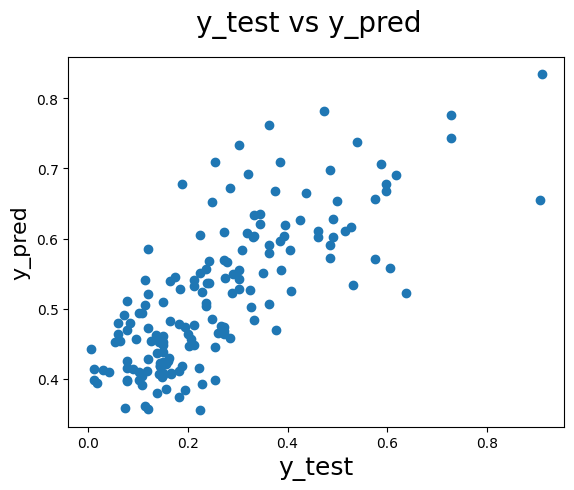

In [230]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


Text(0, 0.5, 'ytest-ypred')

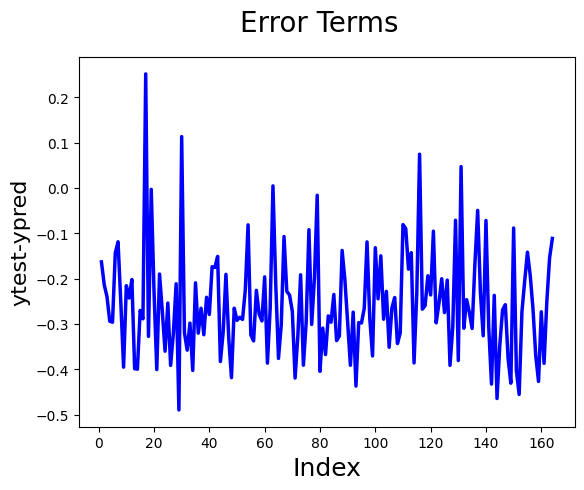

In [231]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                

/var/folders/gg/cr5j8zfd0rn0jfs6967trdth0000gn/T/ipykernel_5273/3657801030.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_m6),bins=50)


Text(0, 0.5, 'Index')

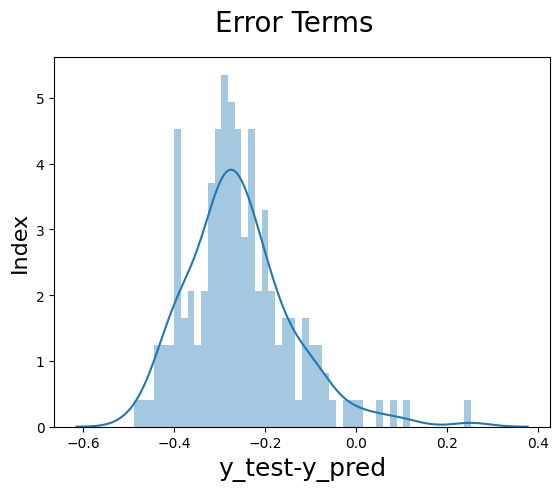

In [232]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label


In [233]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))


RMSE : 0.28121792301472004


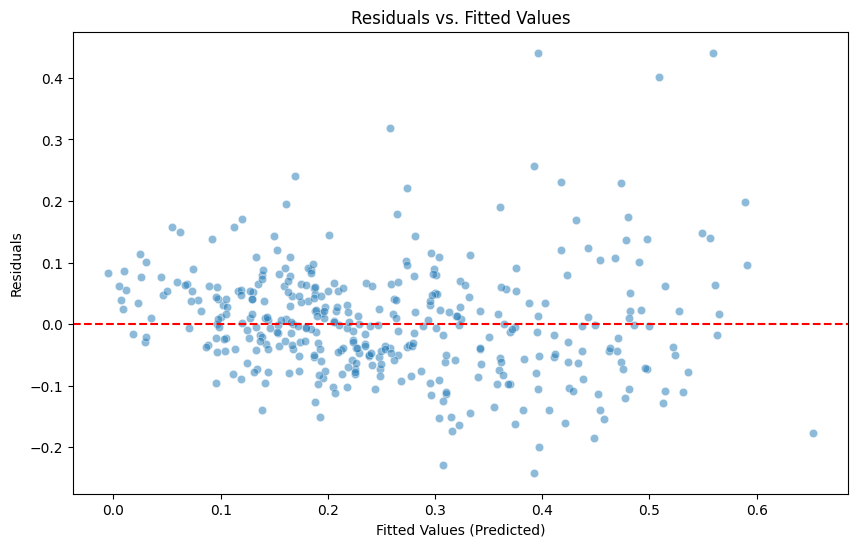

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions and residuals
y_train_pred = lm_6.predict(X_train)  # Predict using the original X_train (with constant)
residuals = y_train - y_train_pred

# Residual vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [235]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(lm_6, power=2, use_f=True)  # power=2 tests quadratic effects
print(reset_test)

<F test: F=1.3928300563797107, p=0.23868798843342942, df_denom=369, df_num=1>
